In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import statsmodels.api as sm

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1fskPQKPc8scZ4I707Lc5b40hp08FK8lTRSZ-N6ZsE3c/edit#gid=311542150'
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
df = pd.read_csv(url_1)
df.head()

,Date,Quantity
0,01-04-2016,388
1,01-05-2016,293
2,01-06-2016,290
3,01-07-2016,402
4,01-08-2016,470


In [ ]:
df.shape

(60, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      60 non-null     object
 1   Quantity  60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = "%d-%m-%Y")
df.head()

,Date,Quantity
0,2016-04-01,388
1,2016-05-01,293
2,2016-06-01,290
3,2016-07-01,402
4,2016-08-01,470


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      60 non-null     datetime64[ns]
 1   Quantity  60 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [ ]:
df.set_index('Date', inplace=True)
df.head()

,Quantity
Date,
2016-04-01,388
2016-05-01,293
2016-06-01,290
2016-07-01,402
2016-08-01,470


<Axes: xlabel='Date'>

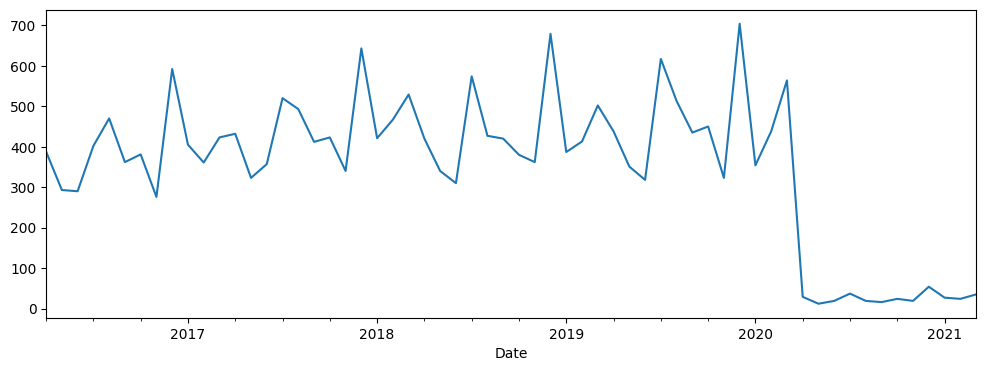

In [ ]:
df['Quantity'].plot(figsize=(12,4))

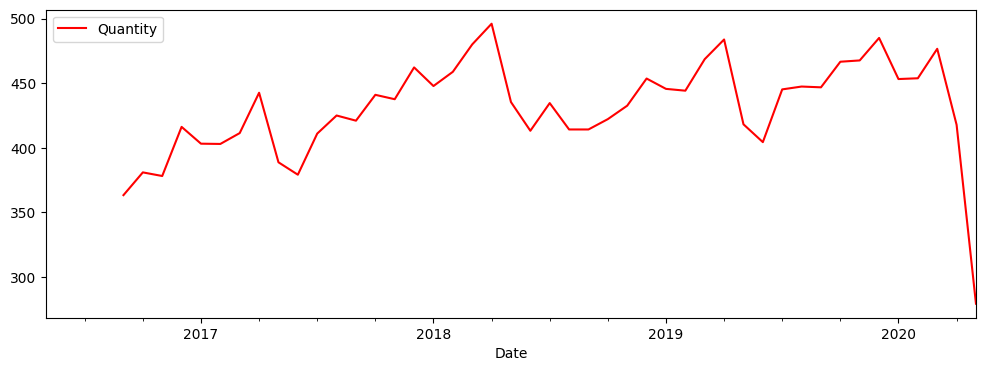

In [ ]:
rollingseries = df[1:50].rolling(window=5)
rollingmean = rollingseries.mean() #we can compute any statistical measure
#print(rollingmean.head(10))
# df['Quantity'].plot(figsize=(12,4))
rollingmean.plot(color="red", figsize=(12,4))
plt.show()

<Axes: xlabel='Date'>

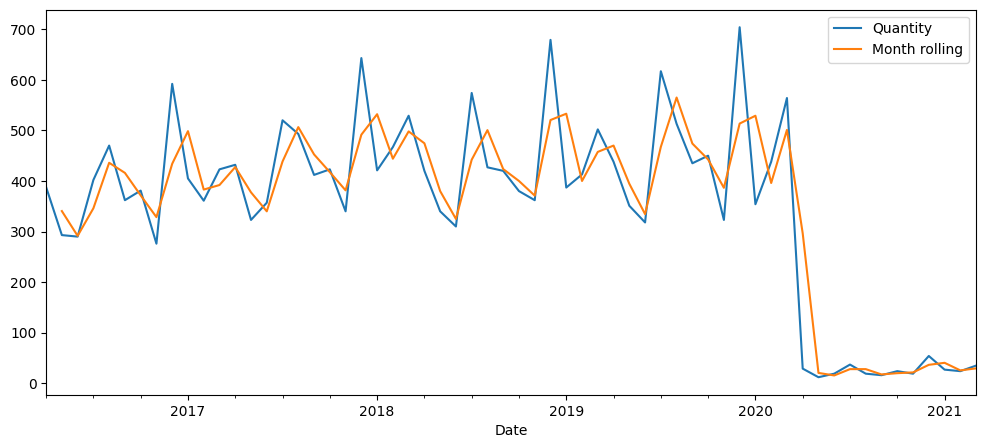

In [ ]:
df['Month rolling']=df['Quantity'].rolling(2).mean()
df[['Quantity','Month rolling']].plot(figsize=(12,5))

In [ ]:
df['err_roll'] = abs(df['Month rolling'] - df['Quantity'])
df_calc = df.reset_index()
df_calc.sum(axis = 0)

<ipython-input-54-c91d4dfbee57>:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Quantity         21037.0
Month rolling    20825.5
err_roll          3061.5
dtype: float64

<Axes: xlabel='Date'>

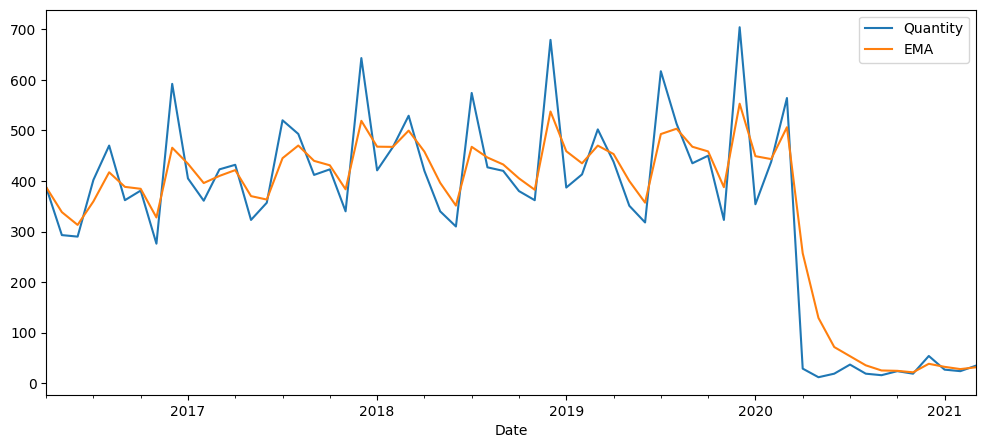

In [ ]:
df['EMA'] = df['Quantity'].ewm(com = 0.916, adjust = False).mean()
df[['Quantity','EMA']].plot(figsize=(12,5))

In [ ]:
df['err_ema'] = abs(df['EMA']-df['Quantity'])
df_calc = df.reset_index()
df_calc.sum(axis = 0)

<ipython-input-56-f37059ddc748>:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Quantity         21037.000000
Month rolling    20825.500000
err_roll          3061.500000
EMA              21363.380358
err_ema           2602.649270
dtype: float64

In [ ]:
import plotly.express as px

In [ ]:
df.head()

,Quantity,Month rolling,err_roll,EMA,err_ema
Date,,,,,
2016-04-01,388,NaN,NaN,388.000000,0.000000
2016-05-01,293,340.5,47.5,338.417537,45.417537
2016-06-01,290,291.5,1.5,313.147424,23.147424
2016-07-01,402,346.0,56.0,359.521420,42.478580
2016-08-01,470,436.0,34.0,417.182474,52.817526


In [ ]:
df_new = df.reset_index()
df_new.head()

,Date,Quantity,Month rolling,err_roll,EMA,err_ema
0,2016-04-01,388,NaN,NaN,388.000000,0.000000
1,2016-05-01,293,340.5,47.5,338.417537,45.417537
2,2016-06-01,290,291.5,1.5,313.147424,23.147424
3,2016-07-01,402,346.0,56.0,359.521420,42.478580
4,2016-08-01,470,436.0,34.0,417.182474,52.817526


In [ ]:
# fig = px.line(df_new, x="Date", y="Quantity", title='Demand')
fig = px.line(df_new, x="Date", y="Quantity")
fig.update_layout(
    title=dict(text="Demand", font=dict(size=18), x = 0.5)
)
# fig.update_layout(title = {'x': 0.5} )
fig.show()

In [ ]:
# import plotly.graph_objects as go
# fig = go.Figure()

## Moving Average

In [ ]:
fig = px.line(df_new, x="Date", y="Quantity")
fig.add_scatter(x=df_new['Date'], y=df['Month rolling'], text = "Moving_Average")
fig.show()

## Exponential Moving Average

In [ ]:
fig = px.line(df_new, x="Date", y="Quantity")
fig.add_scatter(x=df_new['Date'], y=df['EMA'], text = "Moving_Average")
fig.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Quantity'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(df['Quantity'])

ADF Test Statistic : 2.657291861724455
p-value : 0.9990835673257007
#Lags Used : 11
Number of Observations Used : 48
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [ ]:
df['Quantity First Difference'] = df['Quantity'] - df['Quantity'].shift(1)

In [ ]:
df['Seasonal First Difference'] = df['Quantity']-df['Quantity'].shift(12)

In [ ]:
df.head(15)

,Quantity,Month rolling,err_roll,EMA,err_ema,Quantity First Difference,Seasonal First Difference
Date,,,,,,,
2016-04-01,388,NaN,NaN,388.000000,0.000000,NaN,NaN
2016-05-01,293,340.5,47.5,338.417537,45.417537,-95.0,NaN
2016-06-01,290,291.5,1.5,313.147424,23.147424,-3.0,NaN
2016-07-01,402,346.0,56.0,359.521420,42.478580,112.0,NaN
2016-08-01,470,436.0,34.0,417.182474,52.817526,68.0,NaN
2016-09-01,362,416.0,54.0,388.381600,26.381600,-108.0,NaN
2016-10-01,381,371.5,9.5,384.528991,3.528991,19.0,NaN
2016-11-01,276,328.5,52.5,327.885467,51.885467,-105.0,NaN
2016-12-01,592,434.0,158.0,465.732301,126.267699,316.0,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -0.0376088593975799
p-value : 0.955309128918368
#Lags Used : 2
Number of Observations Used : 45
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<Axes: xlabel='Date'>

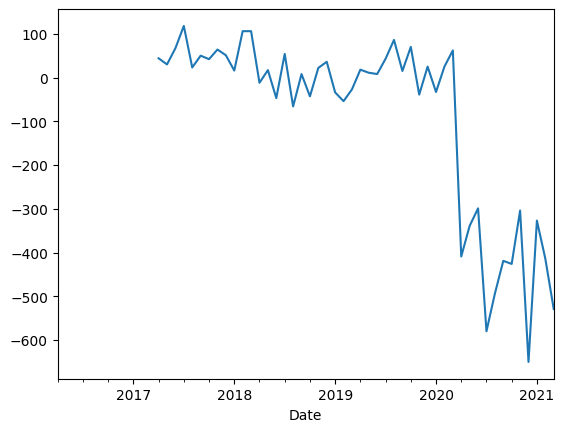

In [ ]:
df['Seasonal First Difference'].plot()

This problem is arising due to the fact that the covid data is highly skewed, lets perform our data analysis on data without covid

In [ ]:
df.tail(14)

,Quantity,Month rolling,err_roll,EMA,err_ema,Quantity First Difference,Seasonal First Difference
Date,,,,,,,
2020-02-01,438,396.0,42.0,443.281163,5.281163,84.0,25.0
2020-03-01,564,501.0,63.0,506.286819,57.713181,126.0,62.0
2020-04-01,29,296.5,267.5,257.180964,228.180964,-535.0,-409.0
2020-05-01,12,20.5,8.5,129.215951,117.215951,-17.0,-339.0
2020-06-01,19,15.5,3.5,71.691968,52.691968,7.0,-299.0
2020-07-01,37,28.0,9.0,53.585513,16.585513,18.0,-580.0
2020-08-01,19,28.0,9.0,35.534619,16.534619,-18.0,-494.0
2020-09-01,16,17.5,1.5,25.339098,9.339098,-3.0,-419.0
2020-10-01,24,20.0,4.0,24.640195,0.640195,8.0,-426.0


In [ ]:
df_wo_covid = df.drop(df.tail(12).index)
df_wo_covid.tail(12)

,Quantity,Month rolling,err_roll,EMA,err_ema,Quantity First Difference,Seasonal First Difference
Date,,,,,,,
2019-04-01,438,470.0,32.0,453.266471,15.266471,-64.0,18.0
2019-05-01,351,394.5,43.5,399.891486,48.891486,-87.0,11.0
2019-06-01,318,334.5,16.5,357.150627,39.150627,-33.0,8.0
2019-07-01,617,467.5,149.5,492.771385,124.228615,299.0,43.0
2019-08-01,513,565.0,52.0,503.329117,9.670883,-104.0,86.0
2019-09-01,435,474.0,39.0,467.666739,32.666739,-78.0,15.0
2019-10-01,450,442.5,7.5,458.446103,8.446103,15.0,70.0
2019-11-01,323,386.5,63.5,387.753982,64.753982,-127.0,-39.0
2019-12-01,704,513.5,190.5,552.809315,151.190685,381.0,25.0


In [ ]:
adfuller_test(df_wo_covid['Quantity'])

ADF Test Statistic : -6.139079755021012
p-value : 8.052873077830076e-08
#Lags Used : 1
Number of Observations Used : 46
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adfuller_test(df_wo_covid['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.762104183355735
p-value : 6.422957706468352e-05
#Lags Used : 0
Number of Observations Used : 35
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

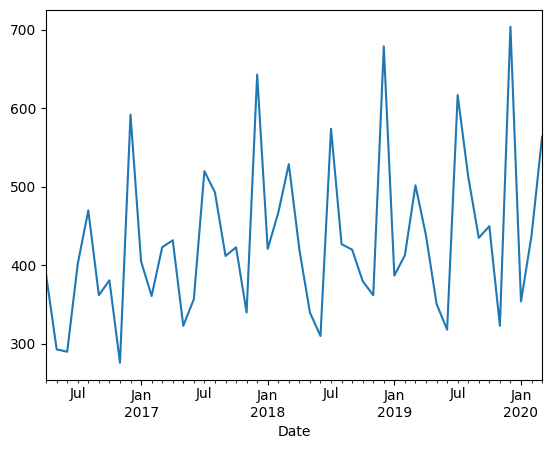

In [ ]:
df_wo_covid['Quantity'].plot()

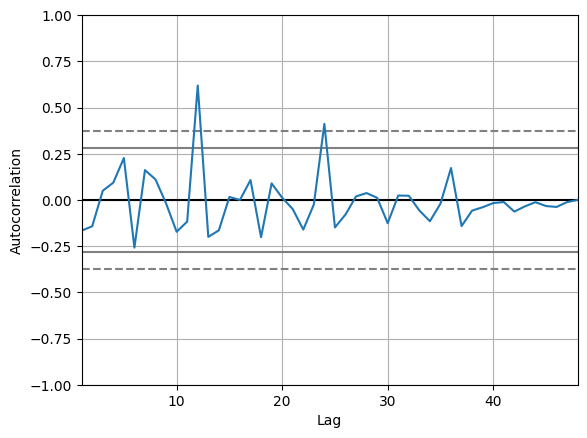

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_wo_covid['Quantity'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
df_wo_covid.head()

,Quantity,Month rolling,err_roll,EMA,err_ema,Quantity First Difference,Seasonal First Difference
Date,,,,,,,
2016-04-01,388,NaN,NaN,388.000000,0.000000,NaN,NaN
2016-05-01,293,340.5,47.5,338.417537,45.417537,-95.0,NaN
2016-06-01,290,291.5,1.5,313.147424,23.147424,-3.0,NaN
2016-07-01,402,346.0,56.0,359.521420,42.478580,112.0,NaN
2016-08-01,470,436.0,34.0,417.182474,52.817526,68.0,NaN


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



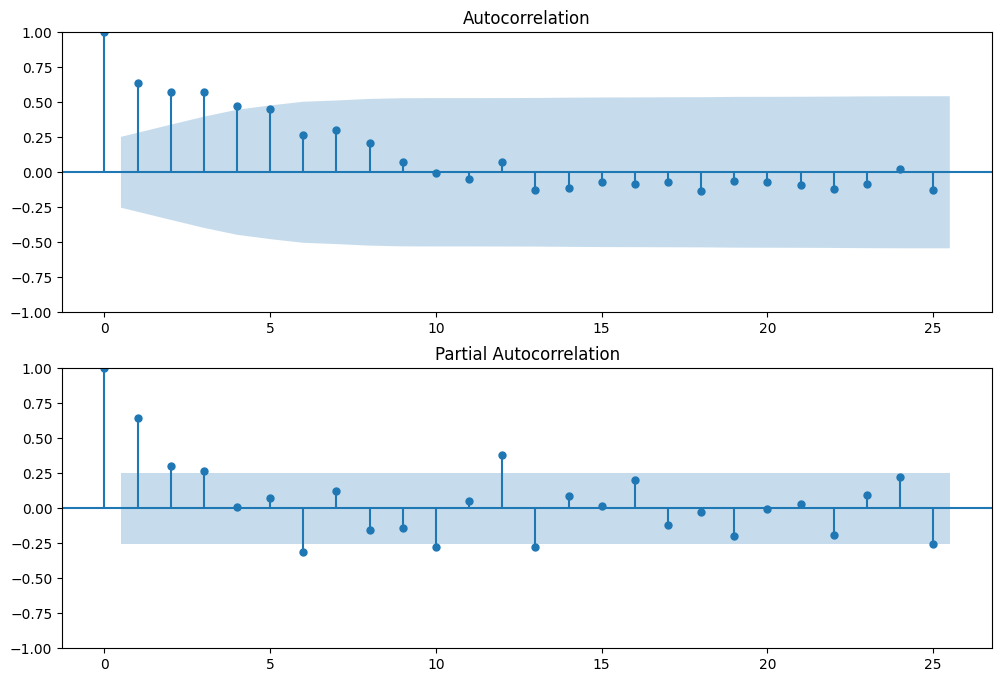

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Quantity'],lags=25,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Quantity'],lags=25,ax=ax2)

2 = AR Value = p <br>
6 = q value = MA value <br>
d = 12

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# model=ARIMA(df_wo_covid['Quantity'],order=(3,0,12))
# model_fit=model.fit()
model = sm.tsa.arima.ARIMA(df_wo_covid['Quantity'], order=(2,6,12), enforce_stationarity=False)
# model = sm.tsa.arima.ARIMA(df_wo_covid['Quantity'], order=(2,2,12))

result = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/

In [ ]:
result.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:1327: UserWarning:

Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:1339: UserWarning:

Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Quantity   No. Observations:                   48
Model:                ARIMA(2, 6, 12)   Log Likelihood                     nan
Date:                Tue, 04 Apr 2023   AIC                                nan
Time:                        10:44:13   BIC                                nan
Sample:                    04-01-2016   HQIC                               nan
                         - 03-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8500        nan        nan        nan         nan         nan
ar.L2         -0.6078        nan        nan        nan         nan         nan
ma.L1               0        nan        nan        nan         nan         nan
ma.L2               0        nan        nan        nan         nan         nan
ma.L3               0        nan        nan        nan         nan         nan
ma.L4               0        nan        nan        nan         nan         nan
ma.L5               0        nan        nan        nan         nan         nan
ma.L6               0        nan        nan        nan         nan         nan
ma.L7               0        nan        nan        nan         nan         nan
ma.L8               0        nan        nan        nan         nan         nan
ma.L9               0        nan        nan        nan         nan         nan
ma.L10              0        nan        nan        nan         nan         nan
ma.L11              0        nan        nan        nan         nan         nan
ma.L12              0        nan        nan        nan         nan         nan
sigma2            nan        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix is singular or near-singular, with condition number    nan. Standard errors may be unstable.
"""